In [1]:
# importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
# reading the dataset
data=pd.read_csv('incident_event_log.csv')
data.head(4)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


In [3]:
data.shape

(141712, 36)

In [4]:
df=data.copy()

In [5]:
# To check the datatypes and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [6]:
# In some of feature there are some symbols, we can replace them with nan 
df=df.replace('?',np.nan)

In [7]:
# Percentage of null features
null_features=df.isnull().sum()/df.shape[0]*100
null_features

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

In [8]:
# features containing null values greater than 35%.
drop_columns=null_features[null_features>35].keys()
drop_columns

Index(['sys_created_by', 'sys_created_at', 'cmdb_ci', 'problem_id', 'rfc',
       'vendor', 'caused_by'],
      dtype='object')

From domain we came to know that 'urgency', and 'priority' having high corelation with each other and these two feature make model overfit so we decided to drop these features.

In [9]:
# dropping the features with null values greater than 35%.
df=df.drop(columns=drop_columns,axis=1)
df=df.drop(['urgency','priority'],axis=1)

In [10]:
# u_symptom has 23% of null values so we replace them with global constant i.e. '0'
df['u_symptom']=df['u_symptom'].fillna('0')

### Handling Categorical Data

In [11]:
# firstly Converting Dependent feature into numeric for better undersatnding
# Using the function str.split() the dependent feature has got encoded as it contains numeric values.
df['impact']=df['impact'].str.split(expand=True)[0]
df['impact']=pd.to_numeric(df['impact'])

In [12]:
# As we can see every feature has some numeric value,  so we can split them and only consider numeric value.
df['caller_id']=df['caller_id'].str.split(expand=True)[1]
df['opened_by']=df['opened_by'].str.split(expand=True)[2]
df['sys_updated_by']=df['sys_updated_by'].str.split(expand=True)[2]
df['location']=df['location'].str.split(expand=True)[1]
df['category']=df['category'].str.split(expand=True)[1]
df['subcategory']=df['subcategory'].str.split(expand=True)[1]
df['u_symptom']=df['u_symptom'].str.split(expand=True)[1]
df['assignment_group']=df['assignment_group'].str.split(expand=True)[1]
df['closed_code']=df['closed_code'].str.split(expand=True)[1]
df['resolved_by']=df['resolved_by'].str.split(expand=True)[2]
df['assigned_to']=df['assigned_to'].str.split(expand=True)[1]

In [13]:
# Using label Encoder to encode the remaining features.
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [14]:
df['incident_state']=lb.fit_transform(df['incident_state'])
df['active']=lb.fit_transform(df['active'])
df['made_sla']=lb.fit_transform(df['made_sla'])
df['knowledge']=lb.fit_transform(df['knowledge'])
df['u_priority_confirmation']=lb.fit_transform(df['u_priority_confirmation'])
df['contact_type']=lb.fit_transform(df['contact_type'])
df['notify']=lb.fit_transform(df['notify'])

In [15]:
# for number feature we can replace initial three letters with 0
df['number']=df['number'].str.replace('INC','0').astype(int)

In [16]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,45,7,1,0,0,0,1,2403,8,29/2/2016 01:16,21,29/2/2016 01:23,3,143,55,170,72,2,56,NaN,1,0,0,5,149,29/2/2016 11:29,5/3/2016 12:00
1,45,8,1,0,0,2,1,2403,8,29/2/2016 01:16,642,29/2/2016 08:53,3,143,55,170,72,2,56,NaN,1,0,0,5,149,29/2/2016 11:29,5/3/2016 12:00
2,45,8,1,0,0,3,1,2403,8,29/2/2016 01:16,804,29/2/2016 11:29,3,143,55,170,72,2,56,NaN,1,0,0,5,149,29/2/2016 11:29,5/3/2016 12:00
3,45,6,0,0,0,4,1,2403,8,29/2/2016 01:16,908,5/3/2016 12:00,3,143,55,170,72,2,56,NaN,1,0,0,5,149,29/2/2016 11:29,5/3/2016 12:00
4,47,7,1,0,0,0,1,2403,397,29/2/2016 04:40,746,29/2/2016 04:57,3,165,40,215,471,2,70,89,1,0,0,5,81,1/3/2016 09:52,6/3/2016 10:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  int32 
 1   incident_state           141712 non-null  int32 
 2   active                   141712 non-null  int64 
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  int64 
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_updated_by           141712 non-null  object
 11  sys_updated_at           141712 non-null  object
 12  contact_type             141712 non-null  int32 
 13  location                 141636 non-null  object
 14  category            

In [18]:
df=df.drop(['opened_at','sys_updated_at','resolved_at','closed_at'],axis=1)

In [19]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
0,45,7,1,0,0,0,1,2403,8,21,3,143,55,170,72,2,56,NaN,1,0,0,5,149
1,45,8,1,0,0,2,1,2403,8,642,3,143,55,170,72,2,56,NaN,1,0,0,5,149
2,45,8,1,0,0,3,1,2403,8,804,3,143,55,170,72,2,56,NaN,1,0,0,5,149
3,45,6,0,0,0,4,1,2403,8,908,3,143,55,170,72,2,56,NaN,1,0,0,5,149
4,47,7,1,0,0,0,1,2403,397,746,3,165,40,215,471,2,70,89,1,0,0,5,81


In [20]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
sys_updated_by                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
# Typecasting to int
df['caller_id']=pd.to_numeric(df['caller_id'])
df['opened_by']=pd.to_numeric(df['opened_by'])
df['sys_updated_by']=pd.to_numeric(df['sys_updated_by'])
df['location']=pd.to_numeric(df['location'])
df['category']=pd.to_numeric(df['category'])
df['subcategory']=pd.to_numeric(df['subcategory'])
df['u_symptom']=pd.to_numeric(df['u_symptom'])
df['assignment_group']=pd.to_numeric(df['assignment_group'])
df['closed_code']=pd.to_numeric(df['closed_code'])
df['resolved_by']=pd.to_numeric(df['resolved_by'])
df['assigned_to']=pd.to_numeric(df['assigned_to'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77395 entries, 4 to 141711
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   number                   77395 non-null  int32
 1   incident_state           77395 non-null  int32
 2   active                   77395 non-null  int64
 3   reassignment_count       77395 non-null  int64
 4   reopen_count             77395 non-null  int64
 5   sys_mod_count            77395 non-null  int64
 6   made_sla                 77395 non-null  int64
 7   caller_id                77395 non-null  int64
 8   opened_by                77395 non-null  int64
 9   sys_updated_by           77395 non-null  int64
 10  contact_type             77395 non-null  int32
 11  location                 77395 non-null  int64
 12  category                 77395 non-null  int64
 13  subcategory              77395 non-null  int64
 14  u_symptom                77395 non-null  int64
 15  i

### Checking For Correlations

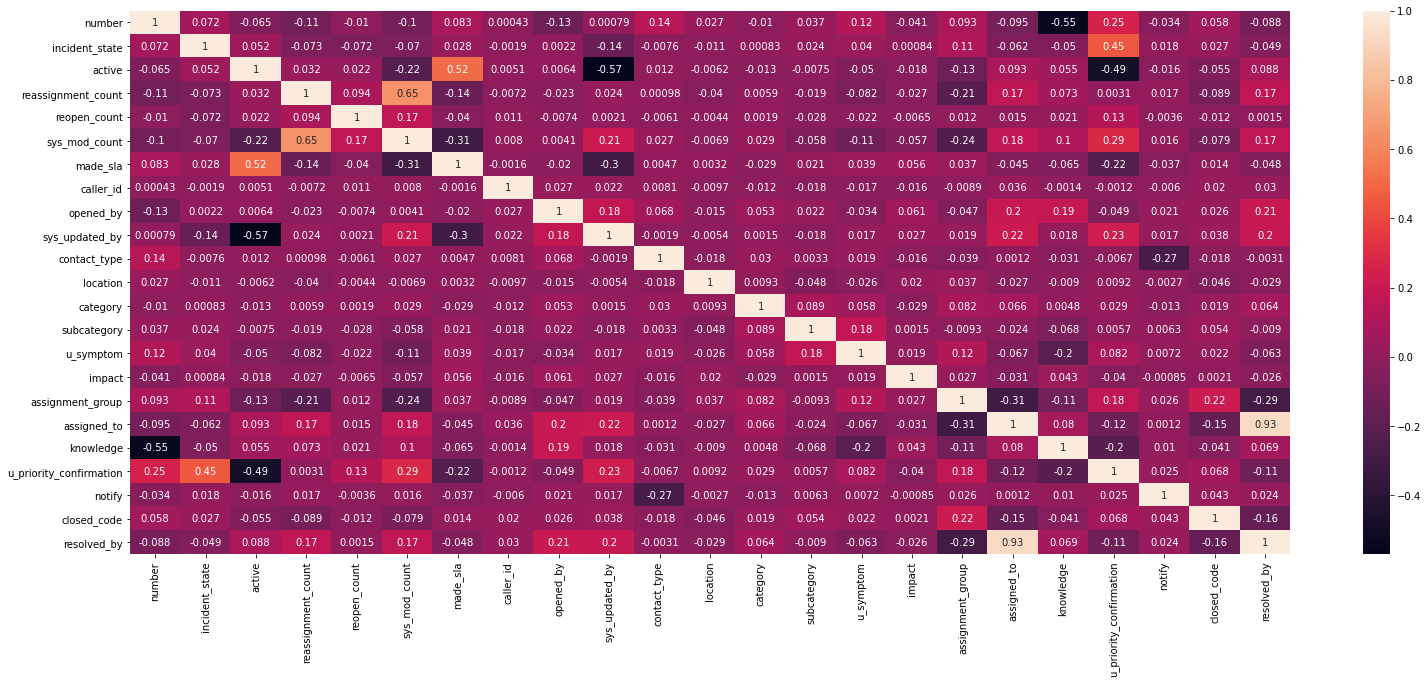

In [24]:
# checking the correlation between the features using spearman.
plt.figure(figsize=(26,10))
corr_df= df.corr(method='spearman')
sns.heatmap(corr_df,annot=True)

In [25]:
low=df[df['impact']==3]
low.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
132,84,1,1,0,0,0,1,3038,433,908,3,204,45,220,253,3,66,175,1,0,0,6,158
133,84,4,1,0,0,1,1,3038,433,804,3,204,45,220,253,3,66,175,1,0,0,6,158
134,84,4,1,0,0,2,1,3038,433,804,3,204,45,220,253,3,66,175,1,0,0,6,158
135,84,4,1,0,0,14,1,3038,433,713,3,204,45,220,253,3,66,175,1,0,0,6,158
136,84,8,1,0,0,18,1,3038,433,713,3,204,45,220,253,3,66,175,1,1,0,6,158
137,84,6,0,0,0,19,0,3038,433,908,3,204,45,220,253,3,66,175,1,1,0,6,158
344,134,7,1,0,0,2,1,2471,501,265,3,204,62,192,580,3,72,216,1,0,0,8,180
345,134,7,1,1,0,1,1,2471,501,750,3,204,62,192,580,3,73,216,1,0,0,8,180
346,134,1,1,1,0,2,1,2471,501,755,3,204,62,192,580,3,73,198,1,0,0,8,180
347,134,8,1,1,0,3,1,2471,501,533,3,204,62,192,580,3,73,198,1,0,0,8,180


In [26]:
X=df.drop(['impact'],axis=1)
y=df['impact']

In [27]:
# splitting the data inot training and testing. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
# Using chi2 for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features=SelectKBest(score_func=chi2,k='all')
order_feature=features.fit(x_train,y_train)
df_score=pd.DataFrame(order_feature.scores_,columns=['Score'])
final_columns=pd.DataFrame(df.columns,columns=['Features'])

In [29]:
feature_rank=pd.concat([final_columns,df_score],axis=1)

In [30]:
feature=feature_rank.nlargest(10,'Score')
feature

,Features,Score
0,number,1.523820e+06
8,opened_by,4.932361e+04
7,caller_id,1.549318e+04
9,sys_updated_by,3.750969e+03
16,assignment_group,3.744856e+03
21,closed_code,2.448433e+03
11,location,1.156983e+03
14,u_symptom,1.029446e+03
13,subcategory,6.579394e+02
17,assigned_to,5.868576e+02


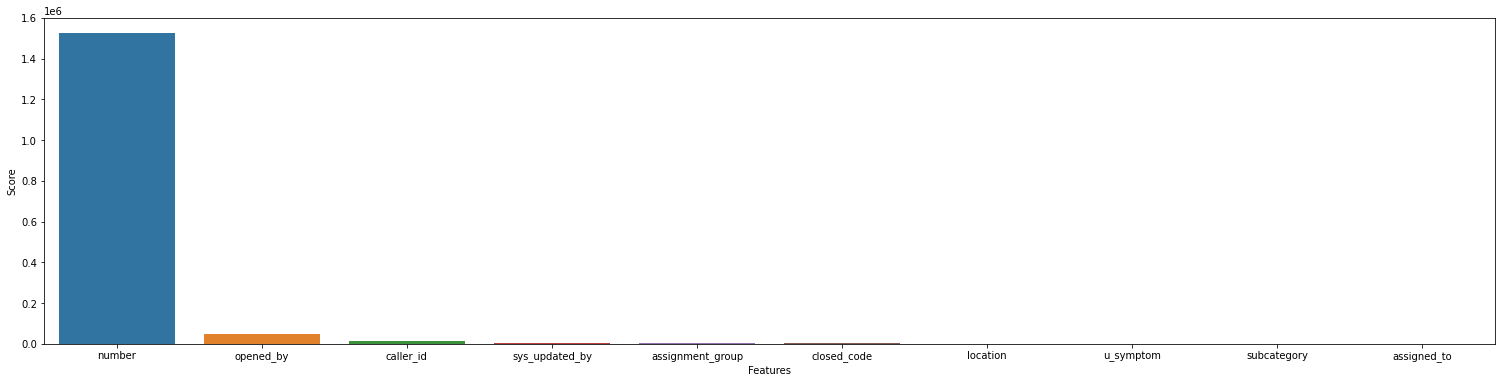

In [31]:
plt.figure(figsize=(26,6))
sns.barplot(feature.Features,feature.Score,data=feature)

In [32]:
# feature importance using Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
        
print(model.feature_importances_)

[0.21067116 0.00689266 0.00169815 0.01965243 0.         0.03648742
 0.00175153 0.16427988 0.15859738 0.01208635 0.00060336 0.06560971
 0.03719305 0.05792963 0.04726529 0.03667714 0.03488908 0.00279253
 0.00912655 0.         0.04339675 0.05239997]


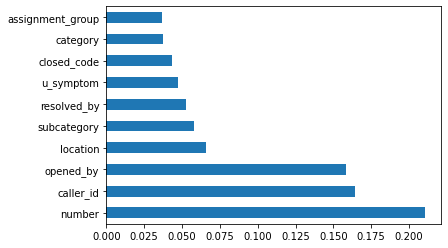

In [34]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [35]:
### Feature imporatance using Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

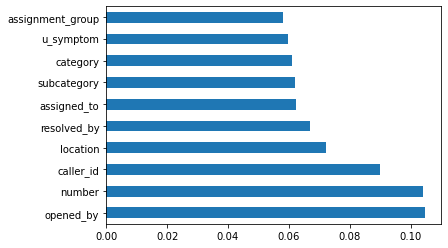

In [36]:
ranked_feature = pd.Series(model.feature_importances_,index= X.columns)
ranked_feature.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
# feature importance using mutual info classification
from sklearn.feature_selection import mutual_info_classif
feature=mutual_info_classif(x_train,y_train)


In [38]:
mutual_info=pd.Series(feature)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

number                     0.159842
caller_id                  0.104579
opened_by                  0.081120
resolved_by                0.059597
assigned_to                0.056964
sys_updated_by             0.035900
u_symptom                  0.034161
subcategory                0.028141
assignment_group           0.027417
category                   0.023716
location                   0.014947
made_sla                   0.011019
contact_type               0.010893
closed_code                0.006377
active                     0.005578
knowledge                  0.004026
sys_mod_count              0.002945
reassignment_count         0.002544
u_priority_confirmation    0.002199
incident_state             0.001373
notify                     0.000363
reopen_count               0.000000
dtype: float64

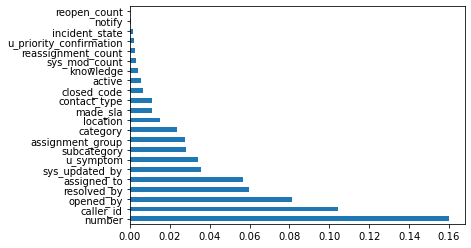

In [39]:
mutual_info.sort_values(ascending=False).plot(kind='barh')

In [40]:
x_train.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
73637,17396,8,1,1,0,29,1,3405,17,109,3,161,34,154,102,24,24,0,1,0,6,22
137296,33708,8,1,0,0,0,1,415,108,908,3,204,42,223,534,70,56,0,0,0,6,52
129430,31674,7,1,0,0,0,1,4198,17,44,3,143,57,170,296,65,25,0,0,0,6,23
21580,4733,4,1,0,0,8,1,5361,17,718,3,51,42,224,7,30,184,1,0,0,6,30
88451,21198,6,0,0,0,3,1,5317,17,908,3,161,42,223,534,70,13,0,1,0,7,11


In [41]:
# assigning the important features to the training data based upon feature engineering 
x_train=x_train[['opened_by','number','location','resolved_by','assigned_to','made_sla','u_symptom','assignment_group','sys_updated_by']]
print(x_train.shape)

(54176, 9)


In [42]:
# assigning the important features to the testing data based upon feature engineering 
x_test=x_test[['opened_by','number','location','resolved_by','assigned_to','made_sla','u_symptom','assignment_group','sys_updated_by']]
print(x_test.shape)

(23219, 9)


In [43]:
x_test

,opened_by,number,location,resolved_by,assigned_to,made_sla,u_symptom,assignment_group,sys_updated_by
90261,62,21683,51,125,139,0,536,10,908
132999,24,32561,245,159,176,1,228,21,653
44993,17,10121,93,196,215,1,491,23,833
85150,500,20383,54,139,155,1,267,57,917
1487,24,510,128,166,183,1,4,39,699
...,...,...,...,...,...,...,...,...,...
17954,24,3942,108,33,34,1,4,27,336
133771,70,32734,143,35,37,1,491,10,908
121582,24,29658,204,62,198,1,474,73,698
34080,17,7597,143,215,236,1,491,28,44


## Model Creation

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [45]:
# model creation using KNN classifier
# here stratified kfold validation technique is used
cv = StratifiedKFold(n_splits= 10)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [46]:
# training the data
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred= knn.predict(x_test)

In [48]:
print(accuracy_score(y_test,y_pred))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))

0.9547784142297256
-----------------------------------------------------------------------------------------------------------------------------------------------
[[  184   366     7]
 [  127 21686   150]
 [   13   387   299]]
-----------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.57      0.33      0.42       557
           2       0.97      0.99      0.98     21963
           3       0.66      0.43      0.52       699

    accuracy                           0.95     23219
   macro avg       0.73      0.58      0.64     23219
weighted avg       0.95      0.95      0.95     23219



In [49]:
# model building using random foret classifeir
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [50]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [51]:
y_prediction=pd.DataFrame(y_pred,columns=['Prediction'])
y_prediction

,Prediction
0,2
1,2
2,2
3,2
4,2
...,...
23214,2
23215,2
23216,2
23217,2


In [52]:
x_test=x_test.reset_index()

In [73]:
results=pd.concat([x_test,y_prediction],axis=1)
results[results['Prediction']==3]

,index,opened_by,number,location,resolved_by,assigned_to,made_sla,u_symptom,assignment_group,sys_updated_by,Prediction
62,55677,70,12851,51,35,37,1,33,43,190,3
122,7003,131,1671,108,33,34,1,486,27,137,3
170,135707,131,33283,46,66,73,1,491,70,908,3
254,111756,20,27059,188,13,15,1,491,64,908,3
309,8289,301,1940,204,126,140,1,387,25,60,3
...,...,...,...,...,...,...,...,...,...,...,...
22960,6998,131,1671,108,33,34,1,486,27,137,3
23043,28428,131,6434,55,66,73,1,534,70,908,3
23088,9807,533,2285,143,154,216,1,589,33,862,3
23138,113585,257,27539,51,36,39,1,532,39,162,3


In [54]:
print(accuracy_score(y_test,y_pred))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))

0.9868211378612344
-----------------------------------------------------------------------------------------------------------------------------------------------
[[  424   130     3]
 [   61 21869    33]
 [    5    74   620]]
-----------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.87      0.76      0.81       557
           2       0.99      1.00      0.99     21963
           3       0.95      0.89      0.92       699

    accuracy                           0.99     23219
   macro avg       0.93      0.88      0.91     23219
weighted avg       0.99      0.99      0.99     23219



In [55]:
cross_val_score(rf,X,y,scoring='accuracy',cv=cv).mean()

0.7469873485513989

In [56]:
import pickle
pickle_out=open('impact.pkl','wb')
pickle.dump(rf,pickle_out)
pickle_out.close()